## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import csv

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.DataFrame.merge(mouse_metadata,study_results,
                    on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
current_num_m= len(merge_df["Mouse ID"])

In [41]:
# 1.-----------CLEANING THE DATA

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"The duplicated mouse in the study is {duplicated_mouse}")


# Get all the data for the duplicate mouse ID. 
clean_study_df= merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first', inplace=False)
clean_study_df.loc[clean_study_df["Mouse ID"]=="g989"]

The duplicated mouse in the study is ['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [42]:
# Checking for null values 
na=clean_study_df.isnull().values.any()

# Checking for the sum of null values 
null= clean_study_df.isnull().sum()
null

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [43]:
# Checking the number of mice in the clean DataFrame.
num_mice =len(clean_study_df["Mouse ID"])
print(f"The final number of mice in the study with no duplicated is {num_mice}")


The final number of mice in the study with no duplicated is 1888


In [44]:
clean_study_df.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [45]:
clean_study_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [46]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

mean_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

statistcs_df= pd.DataFrame({"Mean":mean_tumor, "Median":median_tumor,"Variance":var_tumor, "Stan_Dev":std_tumor, "SEM":sem_tumor})
statistcs_df

,Mean,Median,Variance,Stan_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Drug regime per Tumor volume statistics: in a single line mean, median, variance, standard deviation and sem in one line
stats_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])
stats_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

TypeError: 'str' object is not callable

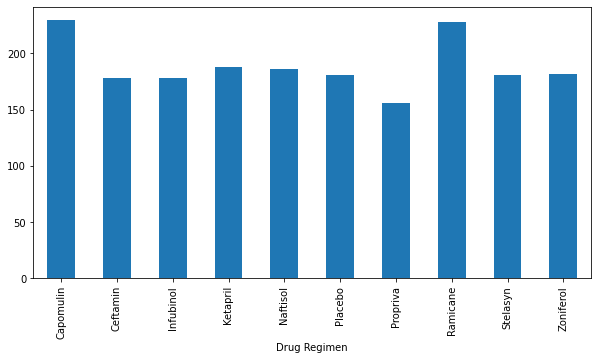

In [48]:
# Generate a bar plot showing the total number of measurements taken per drug regimen using pandas.
total_measures = clean_study_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
total_measures

#Plotting total measurements
plot_total_measures = total_measures.plot(kind="bar",rot=90, figsize=(10,5))
plt.title("Total Number of Measurements per Drug Regime")
plt.ylabel("Total Measurements per Drug Regime")

TypeError: 'str' object is not callable

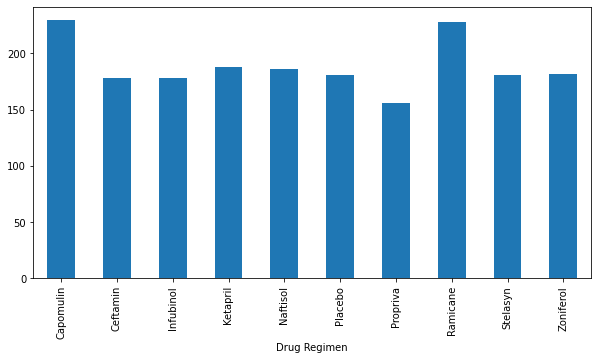

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#Plotting total measurements

#Plotting total measurements
plot_total_measures = total_measures.plot(kind='bar',rot=90, figsize=(10,5))
plt.title("Total Number of Measurements per Drug Regime")
plt.ylabel("Total Measurements per Drug Regime")
plt.show()



In [50]:
# 3.--------Pie Charts

In [51]:
# Find the distribution of female versus male mice using pandas
total_mice_grouped= clean_study_df.groupby(["Sex","Mouse ID"]).size()
total_mice= len(total_mice_grouped)
print(f"The total number of mice is {total_mice}")
#--------Male mice
male_mice = total_mice_grouped["Male"].count()
percent_male_mice = male_mice/total_mice*100
print(f"The number of Male mice is {male_mice} and the percentage is {percent_male_mice}")

#--------Female mice
female_mice = total_mice_grouped["Female"].count()
percent_female_mice = female_mice/total_mice*100
print(f"The number of Female mice is {female_mice} and the percentage is {percent_female_mice}")


The total number of mice is 249
The number of Male mice is 125 and the percentage is 50.20080321285141
The number of Female mice is 124 and the percentage is 49.79919678714859


In [52]:
#----- Summary of mice in the study
male_female_df = pd.DataFrame({"Distribution of mice":[male_mice,female_mice],"Percentage":[percent_male_mice,percent_female_mice]},
                               index=["Male", "Female"])
male_female_df

,Distribution of mice,Percentage
Male,125,50.200803
Female,124,49.799197


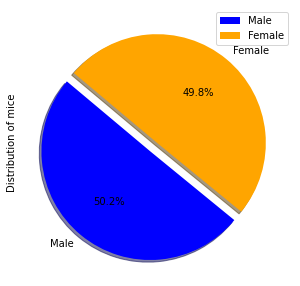

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
colors = ['blue', 'orange']
male_female_df_plot = male_female_df.plot.pie(y='Distribution of mice',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


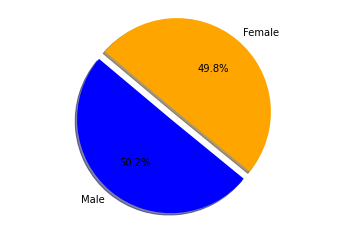

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_mice,female_mice]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.title =('Distribution of mice')
# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


#Set equal axis
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Calculate the final tumor volume for the Top four Drug Regimenes "Capomulin", "Ramicane", "Infubinol", "Ceftamin"

max_tumor_vol= clean_study_df.groupby("Mouse ID").max()
max_tumor_vol_df= max_tumor_vol.reset_index() 
max_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [102]:
#Filtering the data by Drug regimen vs Timepoint
cap_df=clean_study_df.loc[(clean_study_df["Drug Regimen"]=="Capomulin")&(clean_study_df["Timepoint"]==45)]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [103]:
# Merging information of the four top drug regimen and the max tumor volume vs timepoint 
top_tumor_df= max_tumor_vol_df[["Mouse ID","Timepoint"]].merge(clean_study_df,on= ["Mouse ID","Timepoint"],how= "left")
top_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [104]:
# Identifying the Tumor Volume per the top four Drug Regimen
capomulin_vol= top_tumor_df.loc[top_tumor_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]

ramicane_vol= top_tumor_df.loc[top_tumor_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]

infubinol_vol= top_tumor_df.loc[top_tumor_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]

ceftamin_vol= top_tumor_df.loc[top_tumor_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

tumor_volumes = [capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol]


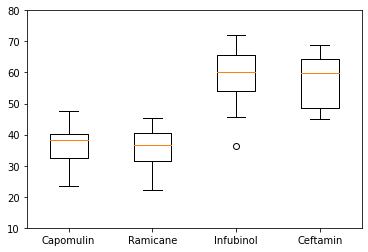

In [105]:
#Listing top drug remines to label dataframe
best_treat = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=best_treat)
plt.ylim(10, 80)
plt.show()

In [106]:
capomulin_vol

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [107]:
# Capomulin quartile calculations
quartiles = capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [108]:
# Ramicane quartile calculations
quartiles = ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [109]:
# Infubinol quartile calculations
quartiles = infubinol_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [110]:
# Ceftamin quartile calculations
quartiles = ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

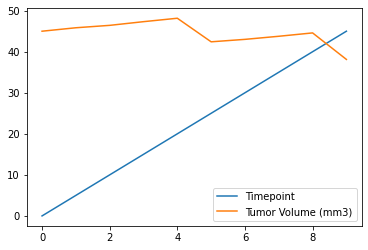

In [111]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_tumor = clean_study_df[clean_study_df["Mouse ID"].isin(["j119"])]

time_tumor_df = [["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot = time_tumor.reset_index()

line_plot_graph = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lines = line_plot_graph.plot.line()

In [112]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_tumor = line_plot_graph['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_graph['Timepoint'].tolist()

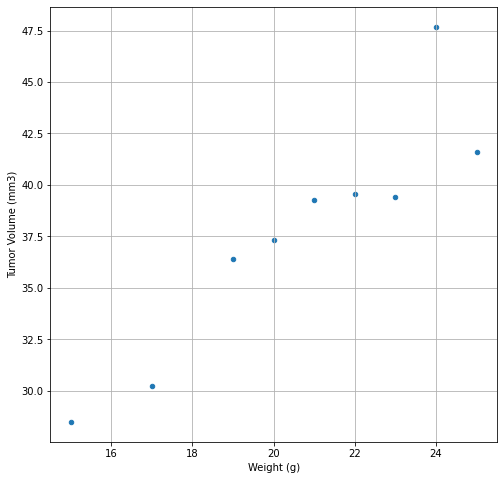

In [113]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_scatter = cap_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_sorted = cap_scatter.sort_values(["Weight (g)"], ascending=True)

cap_scat_plot = cap_scatter.reset_index()

cap_group_weight = cap_scat_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_group_plot = pd.DataFrame(cap_group_weight).reset_index()

cap_scatter = cap_group_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

TypeError: 'str' object is not callable

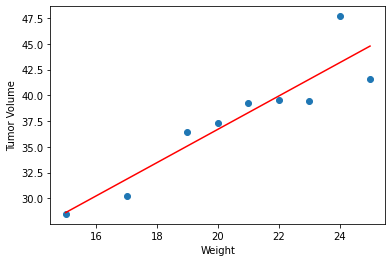

In [120]:
# Calculate the correlation coefficient and linear regression model for mouse weight
x_values = cap_group_plot["Weight (g)"]
y_values = cap_group_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Tumor Vol")
plt.show()